In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

Here we use image dataset of Handwritten Devanagari characters from [UCI](https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset). It's the MNIST equivalent for देवनागरी (Devanagari) script.

In [7]:
path = Path('./devnaagari')
path.ls()

[PosixPath('devnaagari/train'), PosixPath('devnaagari/valid')]

## Load and transform data

Now let's load data, perform image augmentation, cropping, padding and normalization.

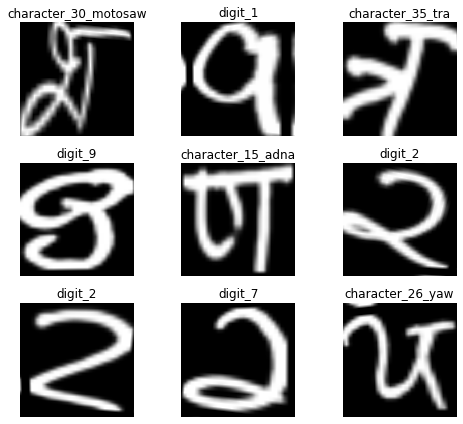

In [11]:
data = ImageDataBunch.from_folder(path,ds_tfms=get_transforms(), size=224, bs=34).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['character_10_yna',
  'character_11_taamatar',
  'character_12_thaa',
  'character_13_daa',
  'character_14_dhaa',
  'character_15_adna',
  'character_16_tabala',
  'character_17_tha',
  'character_18_da',
  'character_19_dha',
  'character_1_ka',
  'character_20_na',
  'character_21_pa',
  'character_22_pha',
  'character_23_ba',
  'character_24_bha',
  'character_25_ma',
  'character_26_yaw',
  'character_27_ra',
  'character_28_la',
  'character_29_waw',
  'character_2_kha',
  'character_30_motosaw',
  'character_31_petchiryakha',
  'character_32_patalosaw',
  'character_33_ha',
  'character_34_chhya',
  'character_35_tra',
  'character_36_gya',
  'character_3_ga',
  'character_4_gha',
  'character_5_kna',
  'character_6_cha',
  'character_7_chha',
  'character_8_ja',
  'character_9_jha',
  'digit_0',
  'digit_1',
  'digit_2',
  'digit_3',
  'digit_4',
  'digit_5',
  'digit_6',
  'digit_7',
  'digit_8',
  'digit_9'],
 46,
 78200,
 13800)

## Training on resnet34

We will use the method of Transfer Learning to train our model. ResNet50 model which was trained on ImageNet dataset, will be downloaded along with the trained weights.

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.485566,0.173656,0.055290,07:11
1,0.236058,0.080822,0.027029,07:01
2,0.142693,0.047295,0.015217,07:00
3,0.100664,0.037948,0.013261,07:01


In [15]:
learn.save('stage-1')

## Fine tuning 

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


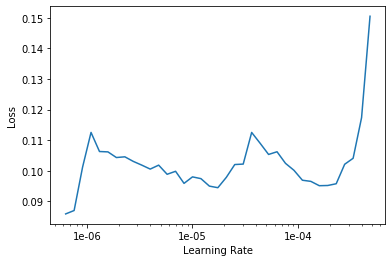

In [18]:
learn.recorder.plot()


In [19]:
learn.fit_one_cycle(2, max_lr=slice(7e-5,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.136364,0.045799,0.015145,09:18
1,0.055280,0.019988,0.006667,09:19


In [20]:
learn.save('stage-2')

## Interpretation

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

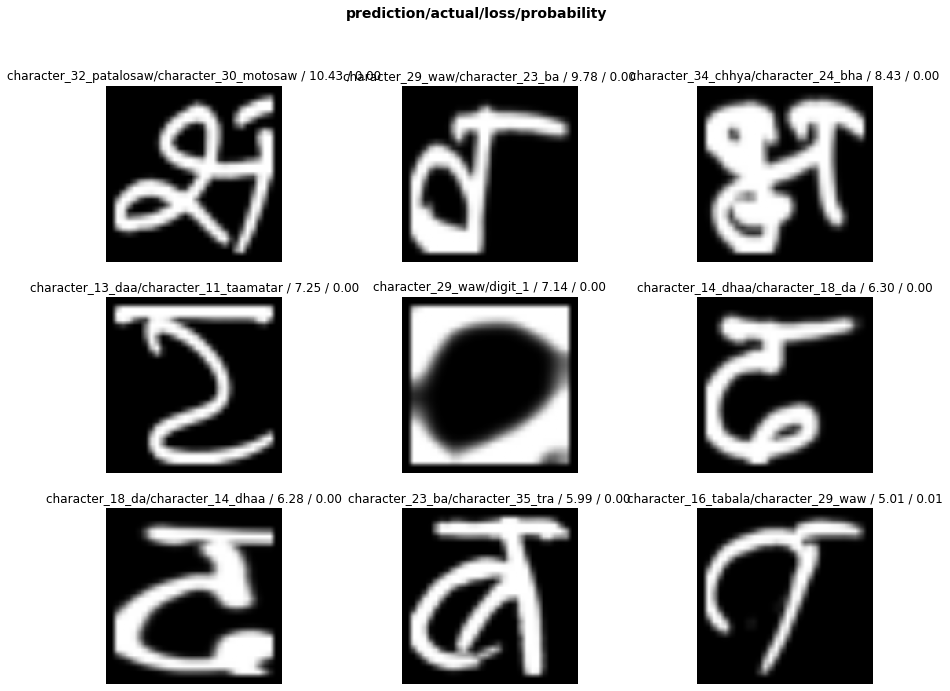

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

In [23]:
interp.most_confused(min_val=2)

[('character_29_waw', 'character_16_tabala', 6),
 ('character_14_dhaa', 'character_18_da', 5),
 ('character_11_taamatar', 'character_13_daa', 4),
 ('character_18_da', 'character_14_dhaa', 4),
 ('character_2_kha', 'character_32_patalosaw', 4),
 ('character_17_tha', 'character_26_yaw', 3),
 ('character_19_dha', 'character_4_gha', 3),
 ('character_23_ba', 'character_29_waw', 3),
 ('character_35_tra', 'character_23_ba', 3),
 ('character_11_taamatar', 'character_12_thaa', 2),
 ('character_15_adna', 'character_3_ga', 2),
 ('character_24_bha', 'character_9_jha', 2),
 ('character_26_yaw', 'character_17_tha', 2),
 ('character_35_tra', 'character_24_bha', 2),
 ('character_6_cha', 'character_26_yaw', 2),
 ('digit_3', 'digit_6', 2)]